<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/Classification_ANN/Classification_logistic_regression_tf_Breast_Cancer_jun_20_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
This code classify cancer according to logistic regression using tensor flow
It correspond a neural network containing only one neuron 
The neuron has activation function type sigmoid
'''

'\nThis code classify cancer according to logistic regression using tensor flow\nIt correspond a neural network containing only one neuron \nThe neuron has activation function type sigmoid\n'

In [2]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.5.0


In [4]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.DESCR # other informations y =data.target, X=data.data, ....

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)

In [9]:
N,D = X_train.shape

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))


In [12]:
model.compile(optimizer = 'adam', 
              loss  ='binary_crossentropy', 
              metrics = 'accuracy')

In [13]:
r = model.fit(X_train,y_train, 
              validation_data=(X_test,y_test),
              epochs = 100, verbose=0)  # verbose = 1 will show the epochs

In [14]:
print('loss and accuray train=',model.evaluate(X_train,y_train))
print('loss and accuray test=',model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9738
loss and accuray train= [0.09507746249437332, 0.9737532734870911]
6/6 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9787
loss and accuray test= [0.07395275682210922, 0.978723406791687]


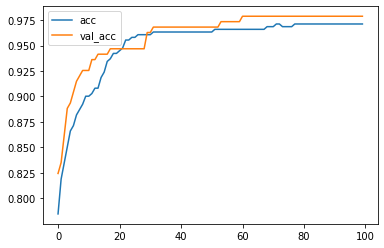

In [15]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

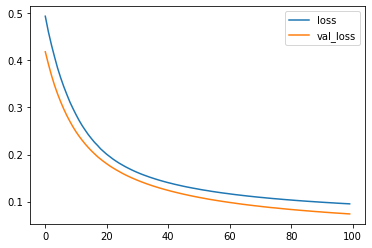

In [16]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [17]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [18]:
pred_test

array([[4.38974297e-08],
       [9.95004535e-01],
       [9.52649951e-01],
       [3.80877852e-02],
       [9.99868393e-01],
       [1.75643231e-06],
       [9.99356031e-01],
       [3.60539377e-01],
       [9.64096665e-01],
       [9.98494089e-01],
       [1.73512101e-03],
       [9.91268873e-01],
       [1.60527229e-03],
       [4.51115251e-01],
       [3.99872661e-03],
       [8.15010935e-05],
       [8.63705277e-01],
       [7.90407896e-01],
       [9.46974754e-03],
       [2.25991011e-04],
       [9.91888762e-01],
       [1.85403526e-02],
       [9.96951342e-01],
       [8.64637256e-01],
       [7.15170622e-01],
       [3.59844744e-01],
       [1.09997054e-04],
       [1.86693966e-02],
       [9.83705938e-01],
       [9.69835043e-01],
       [9.24432874e-02],
       [4.43646312e-03],
       [9.99927163e-01],
       [1.32116675e-02],
       [9.99505758e-01],
       [9.32757735e-01],
       [1.09525979e-01],
       [6.21139116e-05],
       [1.41203403e-04],
       [2.10165977e-03],


In [19]:
pred_train = model.predict_classes(X_train)
pred_test = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
pred_train = (model.predict(X_train) > 0.5).astype("int32")
pred_test = (model.predict(X_train) > 0.5).astype("int32")

In [21]:
print('\n\n', 
      classification_report(y_train, pred_train,
                            target_names=['normal', 'cancer']))



               precision    recall  f1-score   support

      normal       0.97      0.95      0.96       129
      cancer       0.98      0.98      0.98       252

    accuracy                           0.97       381
   macro avg       0.97      0.97      0.97       381
weighted avg       0.97      0.97      0.97       381

